<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import os
import pandas as pd
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
# movie to work on
movie_name = "230531_s1"

In [4]:
# load the movie
movie = io.imread("Data/{}/{}.tif".format(movie_name,movie_name))
print(movie.shape)

(262, 23, 1006, 534, 3)


In [5]:
# compute min, max, mean and stdev of the signals for all channels over time.
minlst, maxlst, meanlst, stdlst = [],[],[],[]
tlst = np.arange(1,movie.shape[0]+1,2)
for t in tlst:
    img = movie[t-1,:,:,:,0]
    minlst.append(np.min(img))
    meanlst.append(np.mean(img))
    stdlst.append(np.std(img))
    maxlst.append(np.max(img))

minlst = np.array(minlst)
maxlst = np.array(maxlst)
meanlst = np.array(meanlst)
stdlst = np.array(stdlst)

<IPython.core.display.Javascript object>


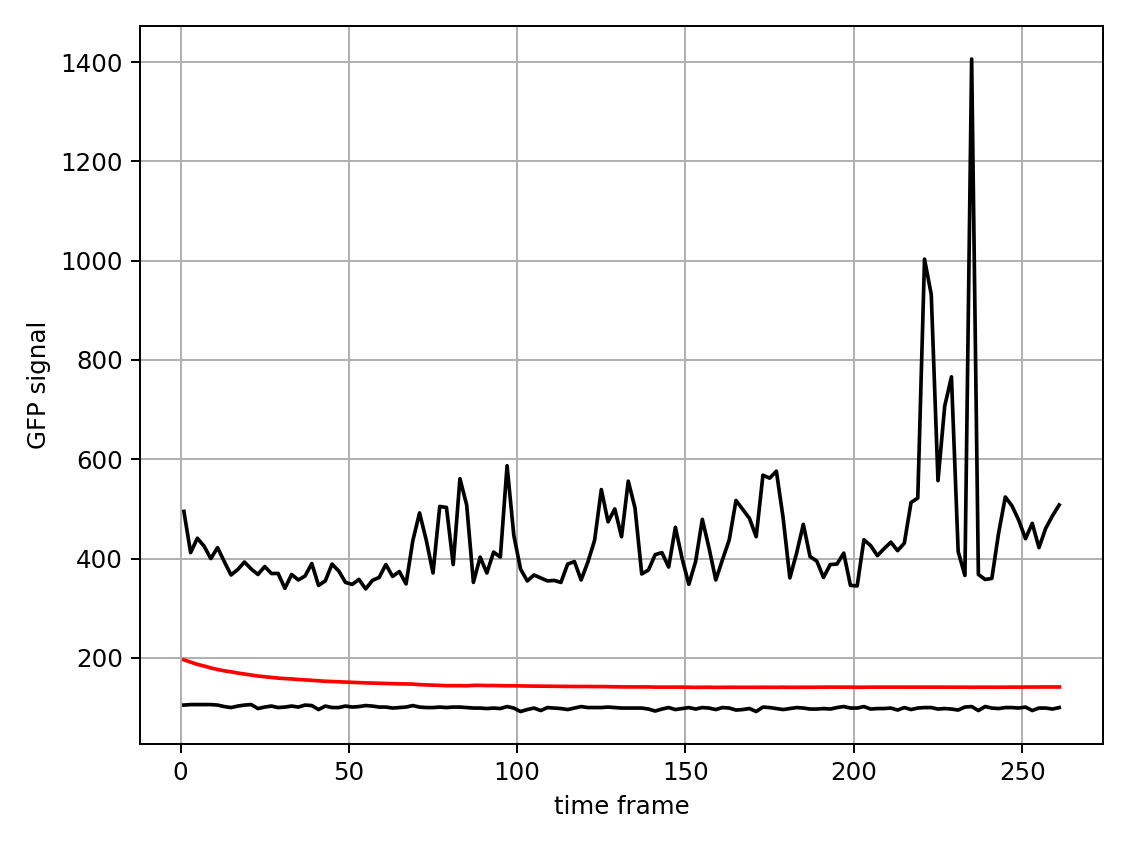

In [7]:
# plot it
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(tlst,minlst,c='k')
ax.plot(tlst,maxlst,c='k')
ax.plot(tlst,meanlst,c='r')
# ax.fill_between(tlst, meanlst-stdlst, meanlst+stdlst, alpha=0.25,color='r')
ax.grid();
ax.set_xlabel("time frame");
ax.set_ylabel("GFP signal");
plt.tight_layout();

In [8]:
# make profil table
gfp_profil = pd.DataFrame({'time':tlst,'min':minlst,'max':maxlst,'mean':meanlst,'std':stdlst})
gfp_profil

time  min  max        mean        std
0       1  105  495  196.005239  20.192611
1       3  106  412  191.434771  19.031614
2       5  106  441  186.926839  18.229408
3       7  106  425  183.630776  17.532107
4       9  106  400  179.716872  16.858990
..    ...  ...  ...         ...        ...
126   253   94  471  141.275191  10.297420
127   255   99  422  141.202055  10.247797
128   257   99  461  141.461865  10.378017
129   259   97  486  141.527673  10.421177
130   261  100  508  141.447553  10.397794

[131 rows x 5 columns]

In [9]:
# save to csv
gfp_profil.to_csv('Data/{}/gfp_profil.csv'.format(movie_name),index=False)